In [1]:
# =====================================
# 🧠 Challenge Alura Store - Análisis de Tiendas
# =====================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import janitor
import folium


raw_path = Path("../data/raw")

# Carga
tienda1 = pd.read_csv(raw_path / "tienda_1.csv")
tienda2 = pd.read_csv(raw_path / "tienda_2.csv")
tienda3 = pd.read_csv(raw_path / "tienda_3.csv")
tienda4 = pd.read_csv(raw_path / "tienda_4.csv")

In [2]:
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# Limpia nombres de columnas automáticamente
tienda1 = tienda1.clean_names()
tienda2 = tienda2.clean_names()
tienda3 = tienda3.clean_names()
tienda4 = tienda4.clean_names()

In [4]:
tienda1.head()

,producto,categoria_del_producto,precio,costo_de_envio,fecha_de_compra,vendedor,lugar_de_compra,calificacion,metodo_de_pago,cantidad_de_cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [5]:
tienda1['metodo_de_pago'].unique()

array(['Tarjeta de crédito', 'Nequi', 'Cupón', 'Tarjeta de débito'],
      dtype=object)

In [6]:
# Crear un DataFrame con los nombres de las columnas de cada tienda
tabla_columnas = pd.DataFrame({
    "Tienda 1": pd.Series(tienda1.columns),
    "Tienda 2": pd.Series(tienda2.columns),
    "Tienda 3": pd.Series(tienda3.columns),
    "Tienda 4": pd.Series(tienda4.columns)
})

# Mostrar la tabla
tabla_columnas


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,producto,producto,producto,producto
1,categoria_del_producto,categoria_del_producto,categoria_del_producto,categoria_del_producto
2,precio,precio,precio,precio
3,costo_de_envio,costo_de_envio,costo_de_envio,costo_de_envio
4,fecha_de_compra,fecha_de_compra,fecha_de_compra,fecha_de_compra
5,vendedor,vendedor,vendedor,vendedor
6,lugar_de_compra,lugar_de_compra,lugar_de_compra,lugar_de_compra
7,calificacion,calificacion,calificacion,calificacion
8,metodo_de_pago,metodo_de_pago,metodo_de_pago,metodo_de_pago
9,cantidad_de_cuotas,cantidad_de_cuotas,cantidad_de_cuotas,cantidad_de_cuotas


In [7]:
print(tienda1.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


In [8]:
print(tienda1['lugar_de_compra'].nunique())
print(tienda2['lugar_de_compra'].nunique())
print(tienda3['lugar_de_compra'].nunique())
print(tienda4['lugar_de_compra'].nunique())

19
19
19
19


In [9]:
tienda1.describe(include='all')

,producto,categoria_del_producto,precio,costo_de_envio,fecha_de_compra,vendedor,lugar_de_compra,calificacion,metodo_de_pago,cantidad_de_cuotas,lat,lon
count,2359,2359,2.359000e+03,2359.000000,2359,2359,2359,2359.000000,2359,2359.000000,2359.000000,2359.000000
unique,51,8,NaN,NaN,1018,14,19,NaN,4,NaN,NaN,NaN
top,TV LED UHD 4K,Muebles,NaN,NaN,15/05/2021,Izabela de León,Bogotá,NaN,Tarjeta de crédito,NaN,NaN,NaN
freq,60,465,NaN,NaN,7,197,984,NaN,1704,NaN,NaN,NaN
mean,NaN,NaN,4.878679e+05,26018.609580,NaN,NaN,NaN,3.976685,NaN,2.943196,5.365283,-74.789417
std,NaN,NaN,6.146868e+05,32860.001783,NaN,NaN,NaN,1.415370,NaN,2.819897,2.287445,1.217827
min,NaN,NaN,7.600000e+03,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-4.215280,-77.281110
25%,NaN,NaN,5.575000e+04,3100.000000,NaN,NaN,NaN,3.000000,NaN,1.000000,4.609710,-75.563590
50%,NaN,NaN,2.353000e+05,12400.000000,NaN,NaN,NaN,5.000000,NaN,1.000000,4.609710,-74.199040
75%,NaN,NaN,6.781000e+05,36000.000000,NaN,NaN,NaN,5.000000,NaN,4.000000,6.251840,-74.081750


In [10]:
tienda1.isnull().sum()

producto                  0
categoria_del_producto    0
precio                    0
costo_de_envio            0
fecha_de_compra           0
vendedor                  0
lugar_de_compra           0
calificacion              0
metodo_de_pago            0
cantidad_de_cuotas        0
lat                       0
lon                       0
dtype: int64

# Ingreso total por cada tienda

In [11]:
# Función para calcular ingresos totales por tienda
def ingresos(df, nombre):
    total = df["precio"].sum()
    return {"Tienda": nombre, "Ingreso Total": total}

# Crear lista con los totales de cada tienda
ingresos_totales = [
    ingresos(tienda1, "Tienda 1"),
    ingresos(tienda2, "Tienda 2"),
    ingresos(tienda3, "Tienda 3"),
    ingresos(tienda4, "Tienda 4")
]

# Convertir a DataFrame
comparativa = pd.DataFrame(ingresos_totales)

# Ordenar ascendente por ingreso total
comparativa = comparativa.sort_values(by="Ingreso Total", ascending=True)

# Mostrar resultados
pd.set_option('display.float_format', '{:,.0f}'.format)
print(comparativa)

     Tienda  Ingreso Total
3  Tienda 4  1,038,375,700
2  Tienda 3  1,098,019,600
1  Tienda 2  1,116,343,500
0  Tienda 1  1,150,880,400


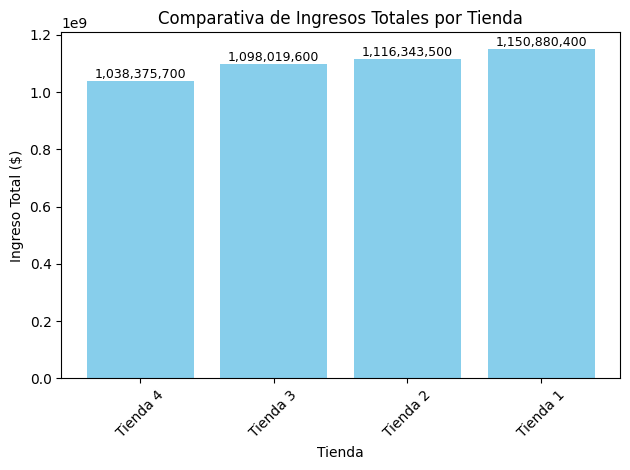

In [12]:
plt.bar(comparativa["Tienda"], comparativa["Ingreso Total"], color="skyblue")
plt.title("Comparativa de Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total ($)")
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas con los valores sobre cada barra
for i, v in enumerate(comparativa["Ingreso Total"]):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.show()

# Ingreso total por lugar y tienda

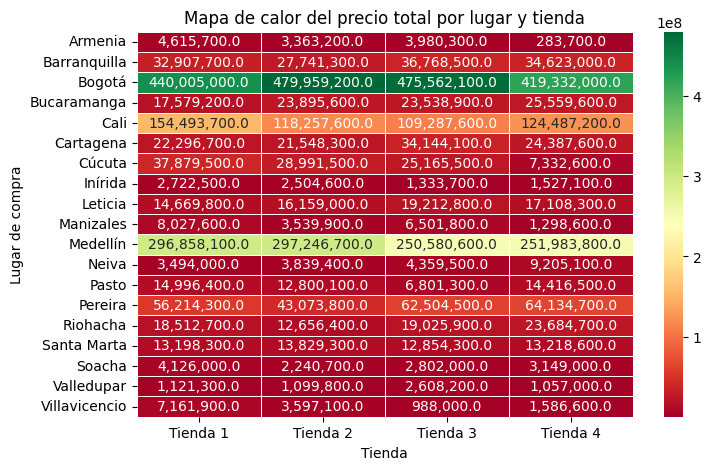

In [13]:
tienda1['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

# Unimos todos los datasets
df = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Agrupamos por lugar y tienda para sumar el total
tabla = df.groupby(['lugar_de_compra', 'tienda'])['precio'].sum().reset_index()

# Convertimos a formato de tabla pivote
pivot = tabla.pivot(index='lugar_de_compra', columns='tienda', values='precio')

# Creamos el mapa de calor
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=",", cmap="RdYlGn", linewidths=.5)
plt.title('Mapa de calor del precio total por lugar y tienda')
plt.xlabel('Tienda')
plt.ylabel('Lugar de compra')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_11768\3392347102.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=pivot.applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else ""),


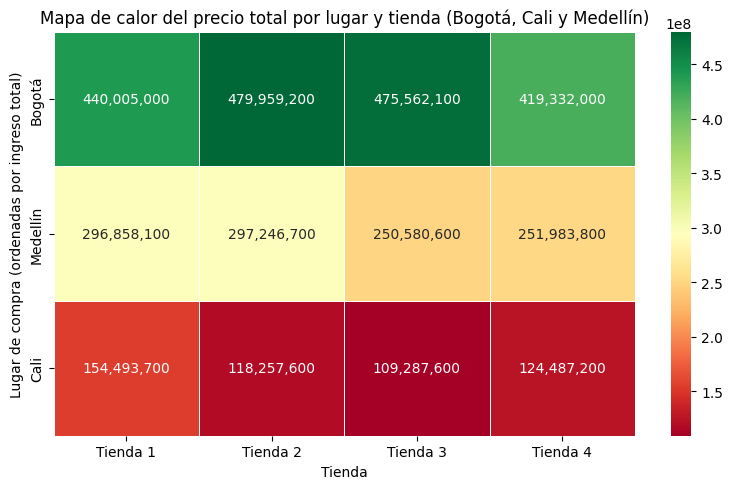

In [14]:
# Filtrar solo las ciudades que antes quitamos
df_grandes = df[df['lugar_de_compra'].isin(['Bogotá','Cali','Medellín'])]

# Agrupar por lugar y tienda para sumar el total
tabla = (
    df_grandes.groupby(['lugar_de_compra','tienda'])['precio']
    .sum()
    .reset_index()
)

# Calcular total por lugar para ordenar de mayor a menor
totales = tabla.groupby('lugar_de_compra')['precio'].sum().sort_values(ascending=False)

# Reordenar el índice según el total de ingresos
tabla['lugar_de_compra'] = pd.Categorical(tabla['lugar_de_compra'], categories=totales.index, ordered=True)

# Crear la tabla pivote
pivot = tabla.pivot(index='lugar_de_compra', columns='tienda', values='precio')

# Graficar el mapa de calor con separadores de miles
plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot=pivot.applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else ""),
    fmt="",
    cmap="RdYlGn",
    linewidths=.5
)
plt.title('Mapa de calor del precio total por lugar y tienda (Bogotá, Cali y Medellín)')
plt.xlabel('Tienda')
plt.ylabel('Lugar de compra (ordenadas por ingreso total)')
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_11768\1071070208.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=pivot.applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else ""),


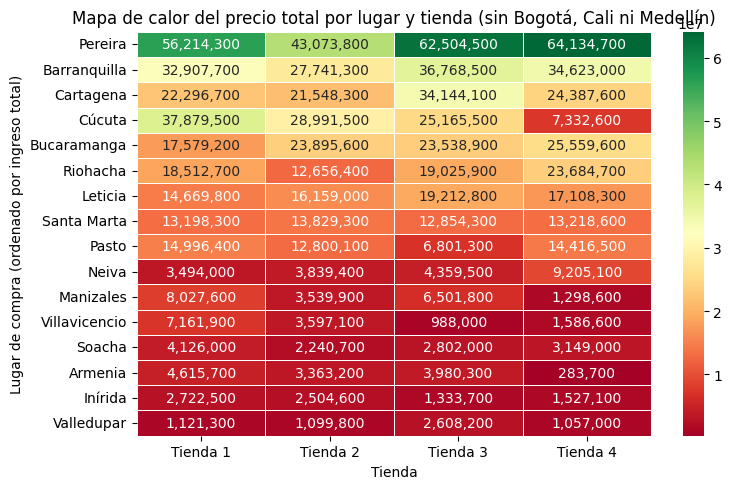

In [15]:
# Filtrar las ciudades que no quieres incluir
filtro = ~df['lugar_de_compra'].isin(['Bogotá','Cali','Medellín'])
df_filtrado = df[filtro]

# Agrupar por lugar y tienda para sumar el total
tabla = (
    df_filtrado.groupby(['lugar_de_compra','tienda'])['precio']
    .sum()
    .reset_index()
)

# Calcular el total por lugar para ordenar
totales = tabla.groupby('lugar_de_compra')['precio'].sum().sort_values(ascending=False)

# Reordenar los lugares según su total de ingresos
tabla['lugar_de_compra'] = pd.Categorical(tabla['lugar_de_compra'], categories=totales.index, ordered=True)

# Pivotear para el heatmap
pivot = tabla.pivot(index='lugar_de_compra', columns='tienda', values='precio')

# Crear el mapa de calor con separadores de miles
plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot=pivot.applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else ""),
    fmt="",
    cmap="RdYlGn",
    linewidths=.5
)
plt.title('Mapa de calor del precio total por lugar y tienda (sin Bogotá, Cali ni Medellín)')
plt.xlabel('Tienda')
plt.ylabel('Lugar de compra (ordenado por ingreso total)')
plt.tight_layout()
plt.show()


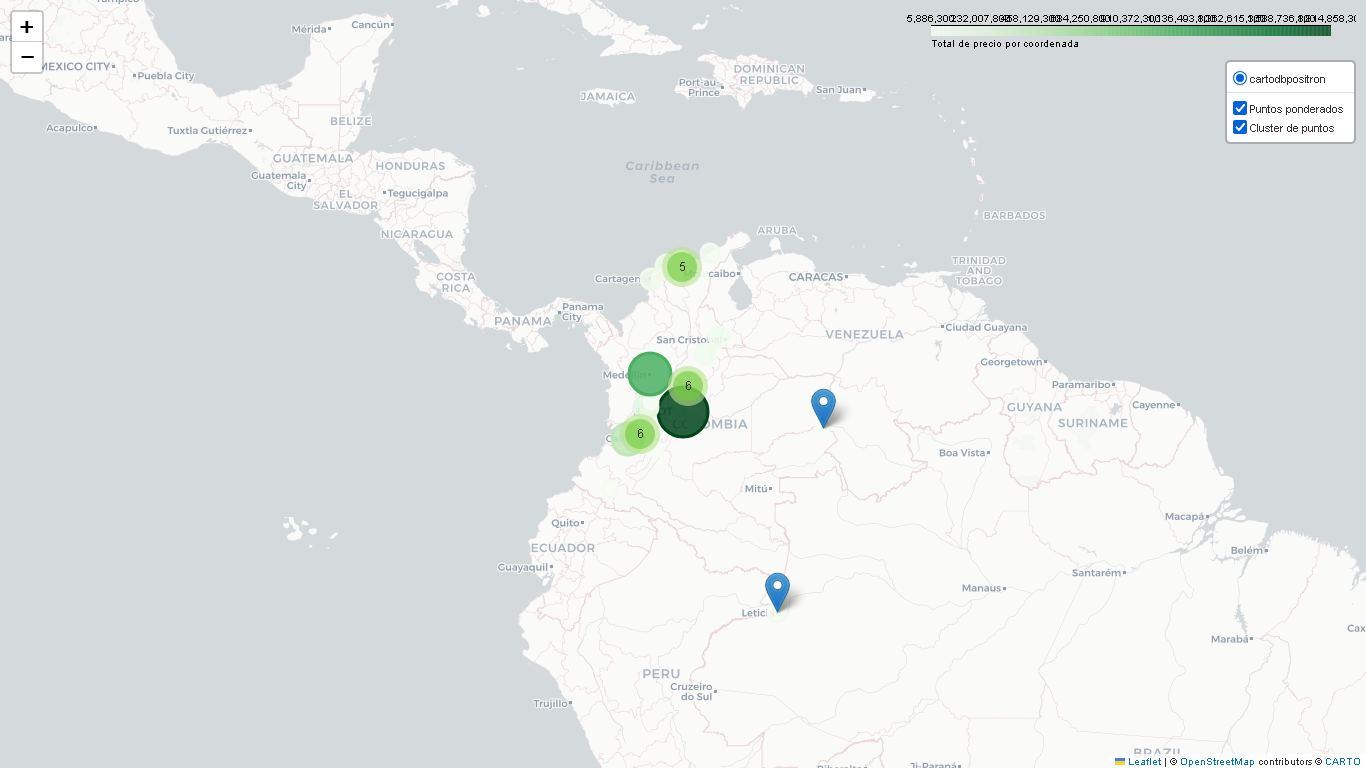

In [30]:
import folium
import pandas as pd
from branca.colormap import linear

# 1) Agregar por coordenada
lugares=(df[['lat','lon','precio']]
         .dropna()
         .groupby(['lat','lon'],as_index=False)['precio']
         .sum())

# 2) Escalas robustas
p99=lugares['precio'].quantile(0.99)
lugares['precio_capped']=lugares['precio'].clip(upper=p99)
# radios en 5..25 px usando raíz para suavizar
MIN_R, MAX_R=5, 25
mx=lugares['precio_capped'].max()
lugares['radio']=MIN_R+(MAX_R-MIN_R)*(lugares['precio_capped']/mx)**0.5

# 3) Colormap verde con leyenda
cmap=linear.Greens_09.scale(lugares['precio'].min(), lugares['precio'].max())
cmap.caption='Total de precio por coordenada'

# 4) Mapa base (cambia a 'CartoDB Dark_Matter' si prefieres oscuro)
m=folium.Map(location=[lugares['lat'].mean(),lugares['lon'].mean()],
             tiles='cartodbpositron',zoom_start=5)

# 5) Capa de círculos proporcionales
fg=folium.FeatureGroup(name='Puntos ponderados')
for _,r in lugares.iterrows():
    color=cmap(r['precio'])
    folium.CircleMarker(
        location=[r['lat'],r['lon']],
        radius=float(r['radio']),
        fill=True,
        fill_color=color,
        color=color,
        fill_opacity=0.85,
        tooltip=f"${r['precio']:,.0f} | ({r['lat']:.3f}, {r['lon']:.3f})"
    ).add_to(fg)
fg.add_to(m)

# 6) Capa alternativa: clustering de puntos (por si quieres explorar densidad)
from folium.plugins import MarkerCluster
mc=MarkerCluster(name='Cluster de puntos')
for _,r in lugares.iterrows():
    folium.Marker(
        location=[r['lat'],r['lon']],
        tooltip=f"${r['precio']:,.0f}"
    ).add_to(mc)
mc.add_to(m)

# 7) Leyenda y control
cmap.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)


m

png_data = m._to_png(5)  # escala 5x
from IPython.display import Image
Image(png_data)

In [18]:
# pip install shapely  # si no lo tienes
from shapely.geometry import shape, Point

# 1) preparar polígonos
polys = [(f["properties"]["NOMBRE_DPT"], shape(f["geometry"])) for f in geo["features"]]

# 2) detectar columnas lat/lon
lat_col = next((c for c in ["lat","latitude","LAT","Lat"] if c in df.columns), None)
lon_col = next((c for c in ["lon","long","longitude","LONG","Long","lng","Lng"] if c in df.columns), None)
if not lat_col or not lon_col:
    raise ValueError("No encuentro columnas de lat/lon en df.")

# 3) función directa (loop sobre ~32 polígonos)
def point_to_depto(lon, lat):
    if pd.isna(lon) or pd.isna(lat):
        return None
    p = Point(float(lon), float(lat))
    for nombre, poly in polys:
        if poly.covers(p):  # covers incluye borde
            return nombre
    return None

# 4) asignar depto y seguir igual
df["depto"] = df.apply(lambda r: point_to_depto(r[lon_col], r[lat_col]), axis=1)
df["precio"] = pd.to_numeric(df["precio"], errors="coerce")
ing = df.groupby("depto", as_index=False).agg(ingresos=("precio","sum"))

dfv = pd.DataFrame([{"NOMBRE_DPT": f["properties"]["NOMBRE_DPT"]} for f in geo["features"]])
dfv = dfv.merge(ing, left_on="NOMBRE_DPT", right_on="depto", how="left").drop(columns=["depto"])



In [19]:
df

,producto,categoria_del_producto,precio,costo_de_envio,fecha_de_compra,vendedor,lugar_de_compra,calificacion,metodo_de_pago,cantidad_de_cuotas,lat,lon,tienda,depto
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74,Tienda 1,SANTAFE DE BOGOTA D.C
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76,Tienda 1,ANTIOQUIA
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76,Tienda 1,BOLIVAR
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77,Tienda 1,VALLE DEL CAUCA
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76,Tienda 1,ANTIOQUIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,"227,700","12,600",12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6,-76,Tienda 4,ANTIOQUIA
2354,Silla de oficina,Muebles,"342,000","18,600",17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7,-73,Tienda 4,SANTANDER
2355,Vaso térmico,Deportes y diversión,"36,700","2,400",03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,5,-74,Tienda 4,SANTAFE DE BOGOTA D.C
2356,Set de ollas,Artículos para el hogar,"151,800","8,300",15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3,-77,Tienda 4,VALLE DEL CAUCA


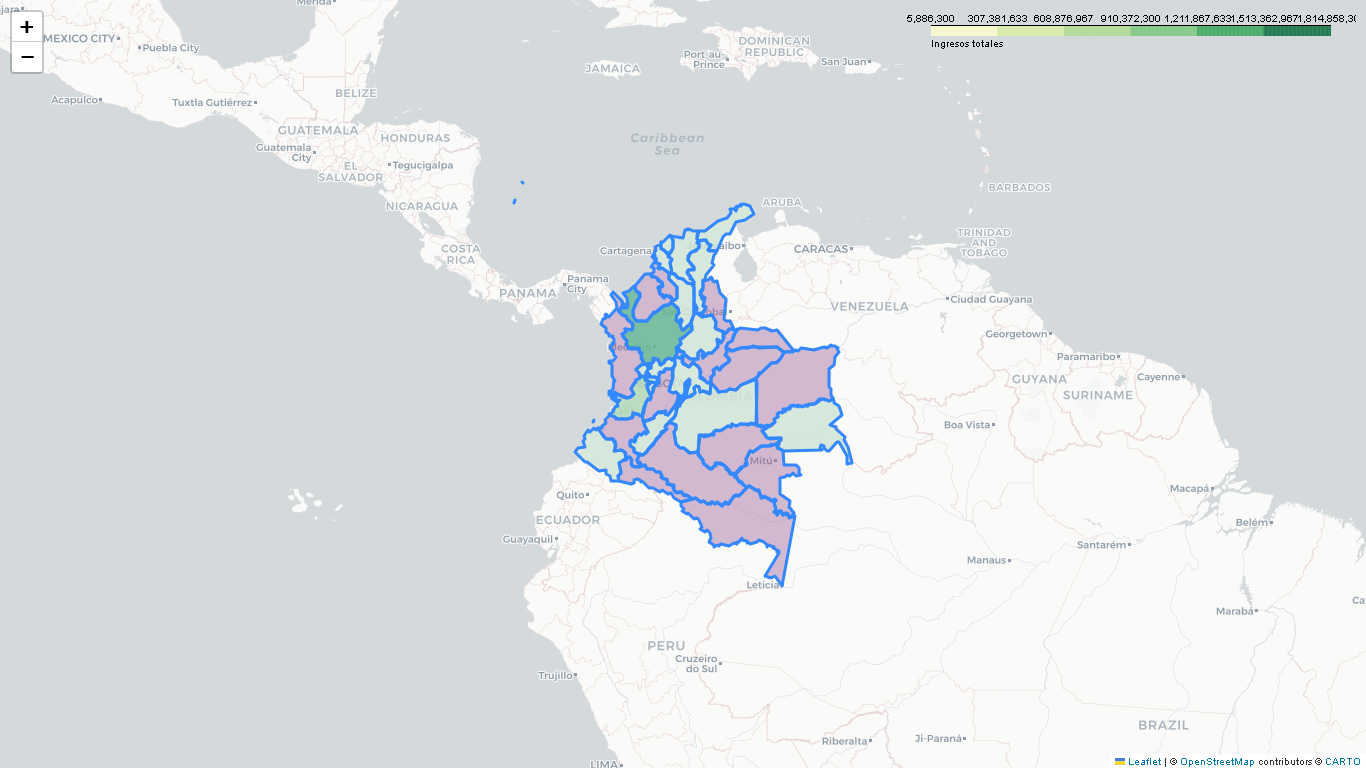

In [28]:
import json, folium, pandas as pd
from folium.features import GeoJsonTooltip

# GeoJSON
with open(r"C:\Users\PC\Desktop\challenge_alura_store\challenge_alura_store\notebooks\src\colombia.geo.json", "r", encoding="utf-8") as f:
    geo = json.load(f)

# Ingresos por departamento (usa df['depto'] y df['precio'])
ing = (df.groupby("depto", as_index=False)["precio"]
         .sum().rename(columns={"depto":"NOMBRE_DPT","precio":"ingresos"}))

# Mapa + coroplético
m = folium.Map(tiles="cartodbpositron", zoom_start=5)
folium.Choropleth(
    geo_data=geo,
    data=ing,                                  # << directo
    columns=["NOMBRE_DPT","ingresos"],
    key_on="feature.properties.NOMBRE_DPT",
    fill_color="YlGn", fill_opacity=0.85, line_opacity=0.3,
    legend_name="Ingresos totales",
    nan_fill_color="#ff5050", nan_fill_opacity=0.3
).add_to(m)

# Tooltip: nombre, código e ingresos
valmap = ing.set_index("NOMBRE_DPT")["ingresos"].to_dict()
geo2 = {"type":"FeatureCollection","features":[
    {"type":"Feature","geometry":g["geometry"],
     "properties":{**g["properties"], "INGRESOS": valmap.get(g["properties"]["NOMBRE_DPT"])}}
    for g in geo["features"]
]}
folium.GeoJson(geo2,
    tooltip=GeoJsonTooltip(fields=["NOMBRE_DPT","DPTO","INGRESOS"],
                           aliases=["Depto:","Código:","Ingresos:"])
).add_to(m)

m.fit_bounds(folium.GeoJson(geo).get_bounds())
m   # .save("mapa_colombia_ingresos.html")

png_data = m._to_png(5)  # escala 5x
from IPython.display import Image
Image(png_data)
